In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split
from torch.utils.data.dataloader import DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
covid19 = pd.read_csv('covid_19_data.csv', sep=",")

In [ ]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid19.dtypes

,0
SNo,int64
ObservationDate,object
Province/State,object
Country/Region,object
Last Update,object
Confirmed,float64
Deaths,float64
Recovered,float64


In [ ]:
covid19.shape

(306429, 8)

In [ ]:
covid19.isnull().sum()

,0
SNo,0
ObservationDate,0
Province/State,78103
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [ ]:
covid19.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [ ]:
covid19.duplicated().sum()

0

In [ ]:
covid19.drop(['SNo', 'Province/State'], axis=1, inplace=True)

In [ ]:
covid19.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
covid19.groupby('Country/Region').sum()

,ObservationDate,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,,
Azerbaijan,02/28/2020,2020-02-28T15:03:26,1.0,0.0,0.0
"('St. Martin',)",03/10/2020,2020-03-10T05:33:02,2.0,0.0,0.0
Afghanistan,02/24/202002/25/202002/26/202002/27/202002/28/...,2020-02-24T23:33:022020-02-24T23:33:022020-02-...,17026442.0,669075.0,13464399.0
Albania,03/09/202003/10/202003/11/202003/12/202003/13/...,2020-03-09T09:03:032020-03-10T12:53:022020-03-...,19768869.0,375955.0,13945256.0
Algeria,02/25/202002/26/202002/27/202002/28/202002/29/...,2020-02-25T23:43:032020-02-25T23:43:032020-02-...,27684358.0,834464.0,18959299.0
...,...,...,...,...,...
West Bank and Gaza,03/26/202003/27/202003/28/202003/29/202003/30/...,2020-03-26 23:53:242020-03-27 23:27:483/8/20 5...,41819444.0,440378.0,37003116.0
Yemen,04/10/202004/11/202004/12/202004/13/202004/14/...,2020-04-10 23:01:432020-04-11 22:52:462020-04-...,962066.0,237613.0,506523.0
Zambia,03/18/202003/19/202003/20/202003/21/202003/22/...,2020-03-18T14:33:152020-03-19T01:53:062020-03-...,13493953.0,205990.0,12625626.0


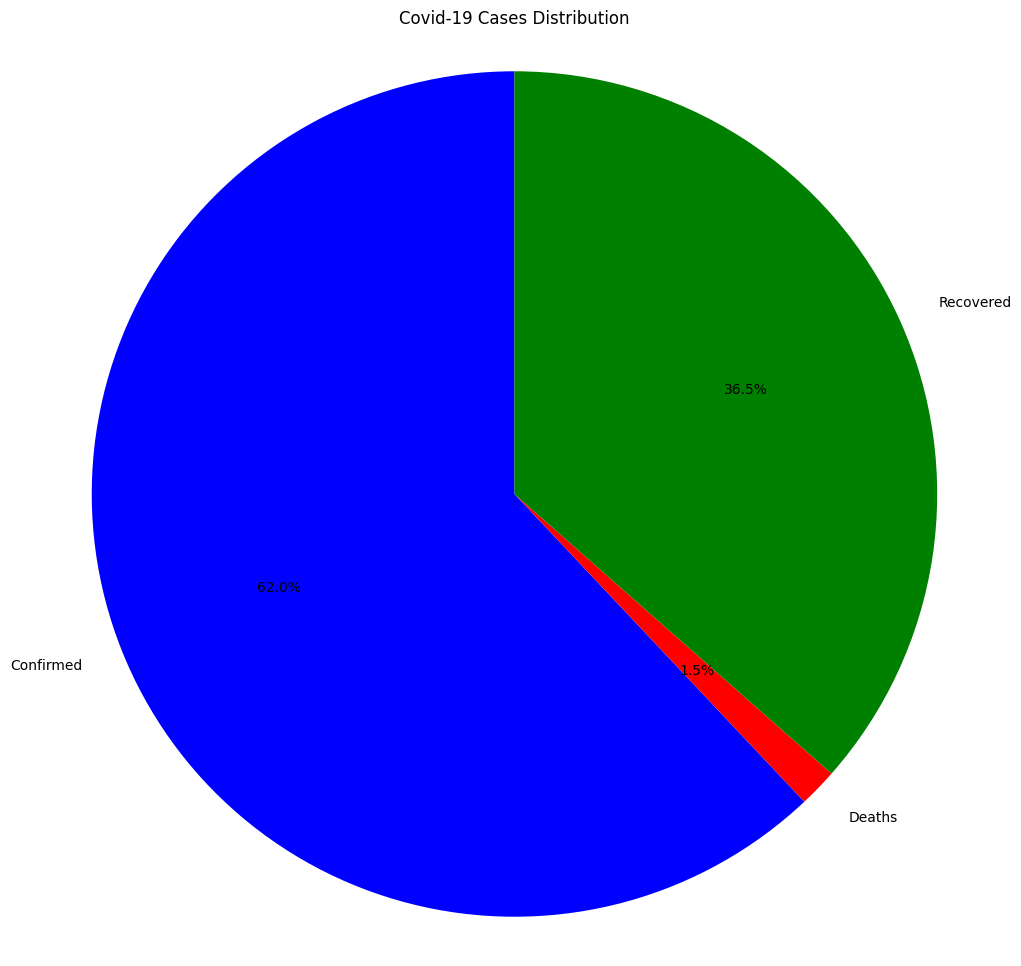

In [ ]:
confirmed_sum = covid19['Confirmed'].sum()
deaths_sum = covid19['Deaths'].sum()
recovered_sum = covid19['Recovered'].sum()
labels = ['Confirmed', 'Deaths', 'Recovered']
sizes = [confirmed_sum, deaths_sum, recovered_sum]
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Covid-19 Cases Distribution')
plt.show()

In [ ]:
covid19.groupby('Country/Region').agg('sum').sort_values('Confirmed', ascending=False).reset_index()

,Country/Region,ObservationDate,Last Update,Confirmed,Deaths,Recovered
0,US,01/22/202001/23/202001/24/202001/24/202001/25/...,1/22/2020 17:001/23/20 17:001/24/20 17:001/24/...,6.049146e+09,123303762.0,5.033710e+08
1,India,01/30/202001/31/202002/01/202002/02/202002/03/...,1/30/20 16:001/31/2020 23:591/31/2020 8:152020...,3.226768e+09,44424723.0,2.900590e+09
2,Brazil,01/23/202002/26/202002/27/202002/28/202002/29/...,1/23/20 17:002020-02-26T23:53:022020-02-26T23:...,2.653588e+09,72624610.0,2.313677e+09
3,Russia,01/31/202002/01/202002/02/202002/03/202002/04/...,1/31/2020 23:591/31/2020 16:132020-01-31T16:13...,9.305488e+08,18363719.0,7.907057e+08
4,France,01/24/202001/25/202001/26/202001/27/202001/28/...,1/24/20 17:001/25/20 17:001/26/20 16:001/27/20...,8.551890e+08,22720818.0,6.940743e+07
...,...,...,...,...,...,...
224,Cape Verde,03/21/2020,2020-03-21T23:43:02,1.000000e+00,0.0,0.000000e+00
225,The Gambia,03/17/202003/18/202003/19/202003/20/202003/21/...,2020-03-17T23:33:022020-03-18T14:13:562020-03-...,1.000000e+00,0.0,0.000000e+00
226,Republic of the Congo,03/16/202003/17/202003/18/202003/19/202003/20/...,2020-03-16T03:33:032020-03-17T21:33:032020-03-...,1.000000e+00,0.0,0.000000e+00
227,Azerbaijan,02/28/2020,2020-02-28T15:03:26,1.000000e+00,0.0,0.000000e+00


In [ ]:
covid19.groupby('ObservationDate').agg('sum').sort_values('Confirmed', ascending=False).reset_index()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,05/29/2021,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2021-05-30 04:20:552021-05-30 04:20:552021-05-...,169951560.0,3533619.0,107140669.0
1,05/28/2021,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2021-05-29 04:20:412021-05-29 04:20:412021-05-...,169470725.0,3523117.0,106633069.0
2,05/27/2021,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2021-05-28 04:20:362021-05-28 04:20:362021-05-...,168970791.0,3511297.0,106078106.0
3,05/26/2021,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2021-05-27 04:20:592021-05-27 04:20:592021-05-...,168416423.0,3498544.0,105380748.0
4,05/25/2021,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,2021-05-26 04:20:352021-05-26 04:20:352021-05-...,167848207.0,3485788.0,104824935.0
...,...,...,...,...,...,...
489,01/26/2020,Mainland ChinaMainland ChinaMainland ChinaMain...,1/26/20 16:001/26/20 16:001/26/20 16:001/26/20...,2118.0,56.0,56.0
490,01/25/2020,Mainland ChinaMainland ChinaMainland ChinaMain...,1/25/20 17:001/25/20 17:001/25/20 17:001/25/20...,1437.0,42.0,42.0
491,01/23/2020,Mainland ChinaMainland ChinaMainland ChinaMain...,1/23/20 17:001/23/20 17:001/23/20 17:001/23/20...,1097.0,34.0,60.0
492,01/24/2020,Mainland ChinaMainland ChinaMainland ChinaMain...,1/24/20 17:001/24/20 17:001/24/20 17:001/24/20...,941.0,26.0,39.0


In [ ]:
covid19["Country/Region"].value_counts()

,count
Country/Region,
Russia,30251
US,26740
Japan,18059
Mainland China,15758
India,13182
...,...
Azerbaijan,1
North Ireland,1
Republic of Ireland,1


In [ ]:
covid19.dtypes

,0
ObservationDate,object
Country/Region,object
Last Update,object
Confirmed,float64
Deaths,float64
Recovered,float64


In [ ]:
covid19.drop(['Country/Region',"Last Update"], axis=1, inplace=True)
covid19.ObservationDate = pd.to_datetime(covid19.ObservationDate)
covid19.dtypes

,0
ObservationDate,datetime64[ns]
Confirmed,float64
Deaths,float64
Recovered,float64


In [ ]:
covid19 = covid19.groupby('ObservationDate').agg({'Confirmed':'sum'}).reset_index()

In [ ]:
covid19.head()

,ObservationDate,Confirmed
0,2020-01-22,557.0
1,2020-01-23,1097.0
2,2020-01-24,941.0
3,2020-01-25,1437.0
4,2020-01-26,2118.0


In [ ]:
class CovidDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        observation_date = row['ObservationDate'].timestamp()
        confirmed = row['Confirmed']

        # Return observation_date as labels
        features = torch.tensor([[observation_date]], dtype=torch.float32)  # Shape: (1, 1) for single sequence
        label = torch.tensor(confirmed, dtype=torch.float32)  # Scalar value
        return features, label


In [ ]:
dataset  = CovidDataset(covid19)

In [ ]:
dataset

In [ ]:
train_dataset_size = int(0.8 * len(dataset))
validation_dataset_size = (len(dataset) - train_dataset_size)
train_dataset, val_dataset = random_split(dataset, [train_dataset_size, validation_dataset_size])

train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_data_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
train_dataset.__len__()

395

In [ ]:
val_dataset.__len__()

99

In [ ]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        hidden_state = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        cell_state = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Permute input to shape (seq_len, batch_size, input_size)

        out, _ = self.lstm(x, (hidden_state, cell_state))

        # Take the last output of the sequence
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

    def train_model(self, train_data_loader, criterion, optimizer, num_epochs=10):
        for epoch in range(num_epochs):
            self.train()
            for inputs, labels in train_data_loader:
                #inputs = inputs.permute(1, 0, 2)
                outputs = self(inputs)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                #if batch_idx % 100 == 0:
                 #   print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  #      epoch, batch_idx * len(data), len(train_data_loader.dataset),
                   #     100. * batch_idx / len(train_data_loader), loss.item()))

    def evaluate_model(self, validation_data_loader, criterion):
        self.eval()
        val_loss = 0
        with torch.no_grad():
            for data in validation_data_loader:
                outputs = self(data.unsqueeze(1).float())
                val_loss += criterion(outputs.squeeze(), data.float()).item()

        val_loss /= len(validation_data_loader)
        print('\nValidation set: Average loss: {:.4f}\n'.format(val_loss))


In [ ]:
# Initializing model
model = LSTM(input_size=1, hidden_size=64, num_layers=2, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# training model
model.train_model(train_data_loader, criterion, optimizer, num_epochs=5)
model.evaluate_model(validation_data_loader, criterion)

RuntimeError: Expected hidden[0] size (2, 1, 64), got [2, 32, 64]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

class CovidDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        observation_date = row['ObservationDate'].timestamp()
        confirmed = row['Confirmed']

        # Return observation_date as labels
        features = torch.tensor([observation_date], dtype=torch.float32).unsqueeze(0)  # Shape: (1, 1) for single sequence
        label = torch.tensor(confirmed, dtype=torch.float32)  # Scalar value
        return features, label

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden_state = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        cell_state = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (hidden_state, cell_state))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

    def train_model(self, train_data_loader, criterion, optimizer, num_epochs=10):
        for epoch in range(num_epochs):
            self.train()
            for inputs, labels in train_data_loader:
                # Ensure inputs have shape (batch_size, seq_len, input_size)
                inputs = inputs.float()
                outputs = self(inputs)
                loss = criterion(outputs.squeeze(), labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Optionally, print loss
                print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

    def evaluate_model(self, validation_data_loader, criterion):
        self.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in validation_data_loader:
                # Ensure inputs have shape (batch_size, seq_len, input_size)
                inputs = inputs.float()
                outputs = self(inputs)
                val_loss += criterion(outputs.squeeze(), labels).item()

        val_loss /= len(validation_data_loader)
        print('\nValidation set: Average loss: {:.4f}\n'.format(val_loss))

dataset = CovidDataset(covid19)

train_dataset_size = int(0.8 * len(dataset))
validation_dataset_size = len(dataset) - train_dataset_size
train_dataset, val_dataset = random_split(dataset, [train_dataset_size, validation_dataset_size])

train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_data_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = LSTM(input_size=1, hidden_size=64, num_layers=2, output_size=1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train_model(train_data_loader, criterion, optimizer, num_epochs=100)
model.evaluate_model(validation_data_loader, criterion)


Train Epoch: 0 	Loss: 5177851510784000.000000
Train Epoch: 0 	Loss: 5868745855598592.000000
Train Epoch: 0 	Loss: 4394806495150080.000000
Train Epoch: 0 	Loss: 3857867400544256.000000
Train Epoch: 0 	Loss: 5002470816219136.000000
Train Epoch: 0 	Loss: 6773089874477056.000000
Train Epoch: 0 	Loss: 5880716466323456.000000
Train Epoch: 0 	Loss: 6010168928108544.000000
Train Epoch: 0 	Loss: 5542431957188608.000000
Train Epoch: 0 	Loss: 5156410497171456.000000
Train Epoch: 0 	Loss: 7138466500444160.000000
Train Epoch: 0 	Loss: 4269774091583488.000000
Train Epoch: 0 	Loss: 1442393362530304.000000
Train Epoch: 1 	Loss: 4308277668085760.000000
Train Epoch: 1 	Loss: 5836751033597952.000000
Train Epoch: 1 	Loss: 5931757857669120.000000
Train Epoch: 1 	Loss: 5683087841165312.000000
Train Epoch: 1 	Loss: 6743944763277312.000000
Train Epoch: 1 	Loss: 5843571441664000.000000
Train Epoch: 1 	Loss: 5617359272280064.000000
Train Epoch: 1 	Loss: 3938969536430080.000000
Train Epoch: 1 	Loss: 661823214426

### Handling Previous Errors on Data Sequence

In [ ]:
covid19 = pd.read_csv('covid_19_data.csv', sep=",", encoding="UTF-8")

In [ ]:
covid19.drop(['SNo', 'Province/State', 'Country/Region',"Last Update"], axis=1, inplace=True)

covid19 = covid19.groupby('ObservationDate').agg({'Confirmed':'sum'}).reset_index()
covid19['ObservationDate'] = pd.to_datetime(covid19['ObservationDate'])

# conversion
covid19['Timestamp'] = covid19['ObservationDate'].apply(lambda x: x.timestamp())

In [ ]:
covid19.dtypes

,0
ObservationDate,datetime64[ns]
Confirmed,float64
Timestamp,float64


In [ ]:
scaler = MinMaxScaler()
covid19['NormalizedDate'] = scaler.fit_transform(covid19[['Timestamp']])

target_scaler = MinMaxScaler()
covid19['NormalizedConfirmed'] = target_scaler.fit_transform(covid19[['Confirmed']])

In [ ]:
class CovidDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        observation_date = row['NormalizedDate']
        confirmed = row['NormalizedConfirmed']

        # Return observation_date as labels
        features = torch.tensor([observation_date], dtype=torch.float32).unsqueeze(0)  # Shape: (1, 1) for single sequence
        label = torch.tensor(confirmed, dtype=torch.float32)  # Scalar value
        return features, label

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden_state = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        cell_state = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (hidden_state, cell_state))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

    def train_model(self, train_data_loader, criterion, optimizer, num_epochs=10):
        train_losses = []
        val_losses = []

        for epoch in range(num_epochs):
            self.train()
            epoch_train_losses = []
            all_preds = []
            all_labels = []

            for inputs, labels in train_data_loader:
                inputs = inputs.float().to(device)  # Ensure inputs are in float format and move to device
                labels = labels.to(device)  # Move labels to device
                outputs = self(inputs)

                loss = criterion(outputs.squeeze(), labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_train_losses.append(loss.item())
                all_preds.extend(outputs.squeeze().detach().cpu().numpy())
                all_labels.extend(labels.detach().cpu().numpy())

            # Calculate and store training loss
            train_mse = mean_squared_error(all_labels, all_preds)
            train_losses.append(train_mse)

            # Evaluate the model on validation set
            val_mse, _ = self.evaluate_model(validation_data_loader, criterion)
            val_losses.append(val_mse)

            print(f'Epoch {epoch + 1}/{num_epochs}, Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}')

        return train_losses, val_losses


    def evaluate_model(self, validation_data_loader, criterion):
        self.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in validation_data_loader:
                inputs = inputs.float().to(device)  # Ensure inputs are in float format and move to device
                labels = labels.to(device)  # Move labels to device
                outputs = self(inputs)

                all_preds.extend(outputs.squeeze().detach().cpu().numpy())
                all_labels.extend(labels.detach().cpu().numpy())

        val_mse = mean_squared_error(all_labels, all_preds)
        return val_mse, None

In [ ]:
dataset = CovidDataset(covid19)

train_dataset_size = int(0.8 * len(dataset))
validation_dataset_size = len(dataset) - train_dataset_size
train_dataset, val_dataset = random_split(dataset, [train_dataset_size, validation_dataset_size])

train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_data_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM(input_size=1, hidden_size=64, num_layers=2, output_size=1).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train_model(train_data_loader, criterion, optimizer, num_epochs=100)
model.evaluate_model(validation_data_loader, criterion)

Epoch 1/100, Train MSE: 0.2045, Validation MSE: 0.1650
Epoch 2/100, Train MSE: 0.1548, Validation MSE: 0.1190
Epoch 3/100, Train MSE: 0.1071, Validation MSE: 0.0840
Epoch 4/100, Train MSE: 0.0837, Validation MSE: 0.0802
Epoch 5/100, Train MSE: 0.0799, Validation MSE: 0.0722
Epoch 6/100, Train MSE: 0.0721, Validation MSE: 0.0647
Epoch 7/100, Train MSE: 0.0644, Validation MSE: 0.0568
Epoch 8/100, Train MSE: 0.0555, Validation MSE: 0.0472
Epoch 9/100, Train MSE: 0.0446, Validation MSE: 0.0362
Epoch 10/100, Train MSE: 0.0325, Validation MSE: 0.0239
Epoch 11/100, Train MSE: 0.0201, Validation MSE: 0.0132
Epoch 12/100, Train MSE: 0.0105, Validation MSE: 0.0065
Epoch 13/100, Train MSE: 0.0050, Validation MSE: 0.0049
Epoch 14/100, Train MSE: 0.0036, Validation MSE: 0.0045
Epoch 15/100, Train MSE: 0.0035, Validation MSE: 0.0044
Epoch 16/100, Train MSE: 0.0033, Validation MSE: 0.0042
Epoch 17/100, Train MSE: 0.0032, Validation MSE: 0.0040
Epoch 18/100, Train MSE: 0.0031, Validation MSE: 0.0041
E

(0.0002514157, None)

Epoch 1/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 2/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 3/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 4/100, Train MSE: 0.0002, Validation MSE: 0.0003
Epoch 5/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 6/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 7/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 8/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 9/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 10/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 11/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 12/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 13/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 14/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 15/100, Train MSE: 0.0002, Validation MSE: 0.0001
Epoch 16/100, Train MSE: 0.0002, Validation MSE: 0.0002
Epoch 17/100, Train MSE: 0.0002, Validation MSE: 0.0003
Epoch 18/100, Train MSE: 0.0002, Validation MSE: 0.0002
E

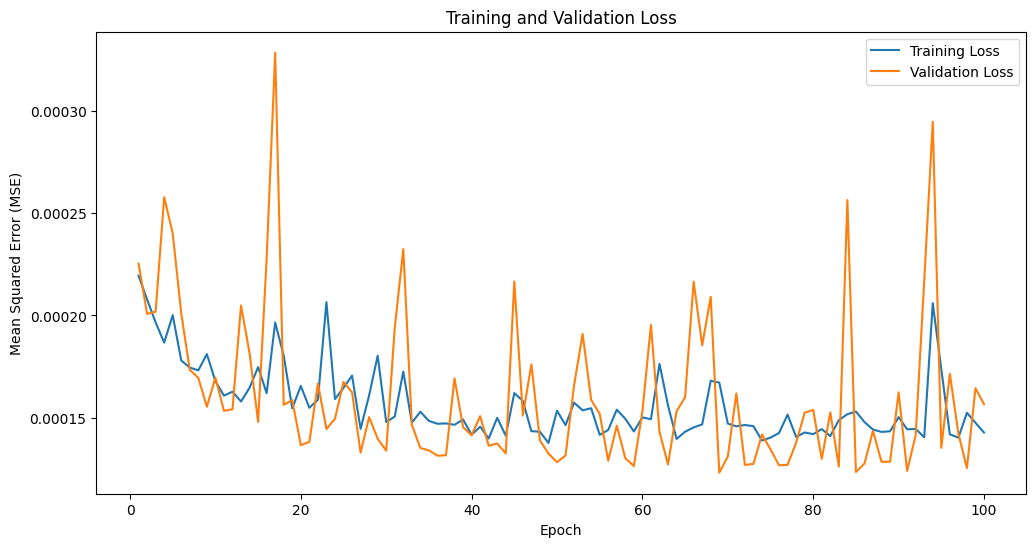

In [ ]:
train_losses, val_losses = model.train_model(train_data_loader, criterion, optimizer, num_epochs=100)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# End